# Introduction

This project focuses on analyzing course data, specifically examining graduate and non-graduate enrollments within distinct cohorts. The objective is to assess potential employment mismatches across different majors. Ultimately, the aim is to identify which enrollment types contribute to favorable employability outcomes, providing insights that universities can leverage to adjust seat capacities for specific disciplines.

In [1]:
# Importing necessary libraries

import Project1_Package.Data_Summary as ds
import Project1_Package.EDA as eda
import Project1_Package.Inference as inf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/kguruchandrak/DAV-5400-Github-Repository/main/Project1/Dataset/grad-students-1.csv")
df.shape


(173, 22)

# Data Summary

In [3]:
obj_ds = ds.data_summary(df)
obj_ds.data_sum()

The data has been acquired from https://github.com/fivethirtyeight/data/tree/master/college-majors
Data set provide 7 attributes in common for Graduates and Non-Graduates
Major_category and Major are of type String and rest of them are float and int type
----------------------------------------------------
Major_code                        int64
Major                            object
Major_category                   object
Grad_total                      float64
Grad_sample_size                float64
Grad_employed                   float64
Grad_full_time_year_round       float64
Grad_unemployed                 float64
Grad_unemployment_rate          float64
Grad_median                     float64
Grad_P25                        float64
Grad_P75                        float64
Nongrad_total                   float64
Nongrad_employed                float64
Nongrad_full_time_year_round    float64
Nongrad_unemployed              float64
Nongrad_unemployment_rate       float64
Nongrad_medi

# Exploratory Data Analysis (EDA)

In [3]:
obj_eda = eda.EDA(df)

In [4]:
# Checking for total sum of Null values in each column

obj_eda.null_sum()

Major_code                       0
Major                            0
Major_category                   0
Grad_total                      10
Grad_sample_size                 5
Grad_employed                    6
Grad_full_time_year_round       12
Grad_unemployed                 10
Grad_unemployment_rate           7
Grad_median                      7
Grad_P25                         6
Grad_P75                        11
Nongrad_total                    4
Nongrad_employed                 8
Nongrad_full_time_year_round    10
Nongrad_unemployed               6
Nongrad_unemployment_rate       11
Nongrad_median                   5
Nongrad_P25                      4
Nongrad_P75                     11
Grad_share                       9
Grad_premium                    10
dtype: int64

In [5]:
# descriptive statistics generation for the dataset
obj_eda.describe()

,Major_code,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
count,173.000000,1.630000e+02,168.000000,167.000000,161.000000,163.000000,166.000000,166.000000,167.000000,162.000000,1.690000e+02,1.650000e+02,1.630000e+02,167.000000,162.000000,168.000000,169.000000,162.000000,164.000000,163.000000
mean,3879.815029,1.301817e+05,2229.428571,95917.892216,71966.322981,3624.098160,0.039338,76739.457831,52526.922156,110278.456790,2.163876e+05,1.573093e+05,1.231656e+05,8271.029940,0.054253,58513.690476,39979.437870,84775.308642,0.403591,0.327298
std,1687.753140,2.250647e+05,3804.668975,162074.303102,123837.423905,6060.984908,0.019349,17057.008522,10860.903958,28292.201032,4.035928e+05,2.958548e+05,2.382688e+05,16238.323785,0.019665,15087.604166,9441.697402,21208.822908,0.166811,0.190888
min,1100.000000,1.542000e+03,22.000000,1008.000000,770.000000,0.000000,0.000000,47000.000000,24500.000000,65000.000000,2.232000e+03,1.328000e+03,1.671000e+03,0.000000,0.000000,37000.000000,25000.000000,48000.000000,0.096320,-0.025000
25%,2403.000000,1.517000e+04,309.750000,12605.000000,10044.000000,451.500000,0.025913,65000.000000,45000.000000,93000.000000,2.221000e+04,1.591400e+04,1.197000e+04,854.500000,0.042033,48000.000000,34000.000000,72000.000000,0.270119,0.225833
50%,3608.000000,3.392800e+04,665.000000,31411.000000,23024.000000,1179.000000,0.036426,74500.000000,50000.000000,106000.000000,6.899300e+04,5.327600e+04,3.838400e+04,2837.000000,0.050993,55000.000000,38000.000000,80000.000000,0.402705,0.320755
75%,5503.000000,1.506610e+05,2547.750000,112240.000000,71683.000000,3464.500000,0.048506,89750.000000,59500.000000,125000.000000,1.849710e+05,1.291790e+05,1.078765e+05,6504.000000,0.064406,65000.000000,44000.000000,98000.000000,0.502527,0.400000
max,6403.000000,1.184158e+06,21994.000000,915341.000000,703347.000000,35718.000000,0.138515,135000.000000,85000.000000,294000.000000,2.996892e+06,2.253649e+06,1.882507e+06,136978.000000,0.160907,126000.000000,80000.000000,215000.000000,0.931175,1.647059


In [6]:
obj_eda.describe_colname('Grad_sample_size')

count      168.000000
mean      2229.428571
std       3804.668975
min         22.000000
25%        309.750000
50%        665.000000
75%       2547.750000
max      21994.000000
Name: Grad_sample_size, dtype: float64

In [7]:
obj_eda.describe_colname('Grad_unemployed')

count      163.000000
mean      3624.098160
std       6060.984908
min          0.000000
25%        451.500000
50%       1179.000000
75%       3464.500000
max      35718.000000
Name: Grad_unemployed, dtype: float64

In [8]:
# filling null values with median

obj_eda.fill_na_with_median().describe()
df = obj_eda.fill_na_with_median()

# initialsing the aboject with new non null data
obj_eda = eda.EDA(df)

In [10]:
obj_eda.describe()

,Major_code,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
count,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,1.246179e+05,2184.213873,93680.658960,68571.479769,3482.763006,0.039220,76648.843931,52439.283237,110006.416185,2.129796e+05,1.524985e+05,1.182649e+05,8082.566474,0.054045,58412.138728,39933.670520,84471.676301,0.403545,0.326920
std,1687.753140,2.195829e+05,3758.163990,159661.745786,120088.717280,5909.927808,0.018959,16712.173492,10679.859399,27392.579306,3.994904e+05,2.897223e+05,2.320885e+05,15983.718432,0.019042,14878.407272,9336.032813,20552.679225,0.162388,0.185263
min,1100.000000,1.542000e+03,22.000000,1008.000000,770.000000,0.000000,0.000000,47000.000000,24500.000000,65000.000000,2.232000e+03,1.328000e+03,1.671000e+03,0.000000,0.000000,37000.000000,25000.000000,48000.000000,0.096320,-0.025000
25%,2403.000000,1.707500e+04,314.000000,12708.000000,10826.000000,472.000000,0.026647,65000.000000,45000.000000,95000.000000,2.285300e+04,1.629800e+04,1.366500e+04,880.000000,0.042648,49000.000000,34000.000000,73000.000000,0.275761,0.230769
50%,3608.000000,3.392800e+04,665.000000,31411.000000,23024.000000,1179.000000,0.036426,74500.000000,50000.000000,106000.000000,6.899300e+04,5.327600e+04,3.838400e+04,2837.000000,0.050993,55000.000000,38000.000000,80000.000000,0.402705,0.320755
75%,5503.000000,1.288920e+05,2423.000000,103790.000000,60310.000000,3106.000000,0.046633,89000.000000,56000.000000,125000.000000,1.793350e+05,1.249790e+05,1.003300e+05,6305.000000,0.063200,65000.000000,44000.000000,96000.000000,0.497074,0.391304
max,6403.000000,1.184158e+06,21994.000000,915341.000000,703347.000000,35718.000000,0.138515,135000.000000,85000.000000,294000.000000,2.996892e+06,2.253649e+06,1.882507e+06,136978.000000,0.160907,126000.000000,80000.000000,215000.000000,0.931175,1.647059


In [11]:
obj_eda.describe_colname('Grad_sample_size')

count      173.000000
mean      2184.213873
std       3758.163990
min         22.000000
25%        314.000000
50%        665.000000
75%       2423.000000
max      21994.000000
Name: Grad_sample_size, dtype: float64

In [12]:
obj_eda.describe_colname('Grad_unemployed')

count      173.000000
mean      3482.763006
std       5909.927808
min          0.000000
25%        472.000000
50%       1179.000000
75%       3106.000000
max      35718.000000
Name: Grad_unemployed, dtype: float64

# EDA MAJOR

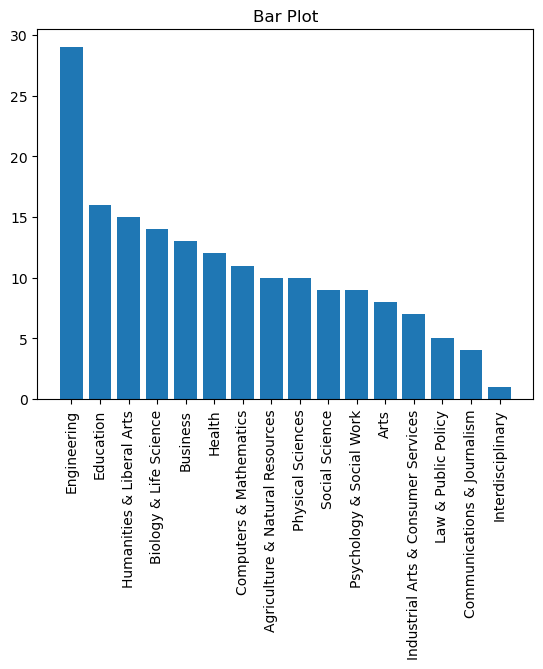

In [13]:
# Plotting a bar graph with respective to count of each major for grad and non grad using matplotlib

obj_eda.bar_plot_Matplotlib(df['Major_category'].value_counts().index,df['Major_category'].value_counts().values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


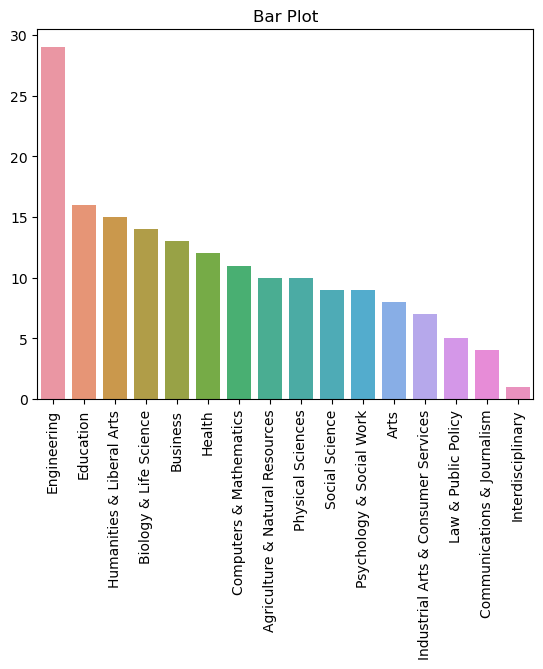

In [14]:
# Plotting a bar graph with respective to count of each major for grad and non grad using seaborn

obj_eda.bar_plot_Seaborn(df['Major_category'].value_counts().index,df['Major_category'].value_counts().values)

# Observations
Upon aggregating data from both graduate and non-graduate programs, it becomes apparent that the field of Engineering exhibits a greater diversity of specializations."

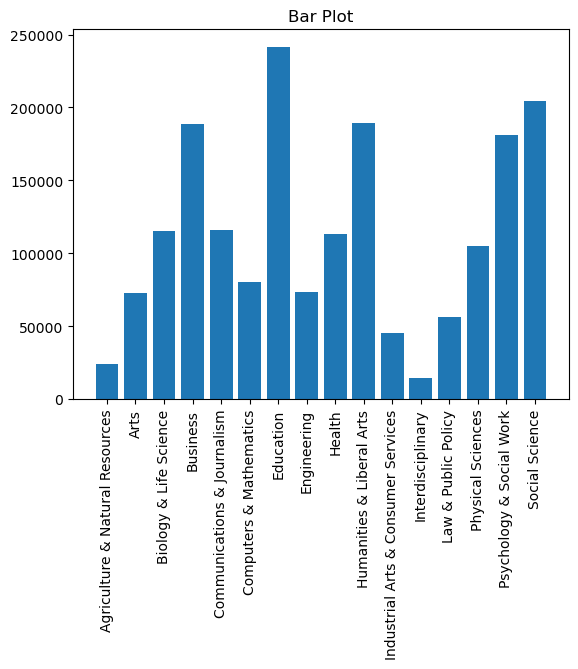

In [15]:
# Finding the mean value for total grad students and plot a bar graph for grad students using matplotlib

obj_eda.bar_plot_Matplotlib(df.groupby(['Major_category']).Grad_total.mean().index.tolist(),df.groupby(['Major_category']).Grad_total.mean().values.tolist())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

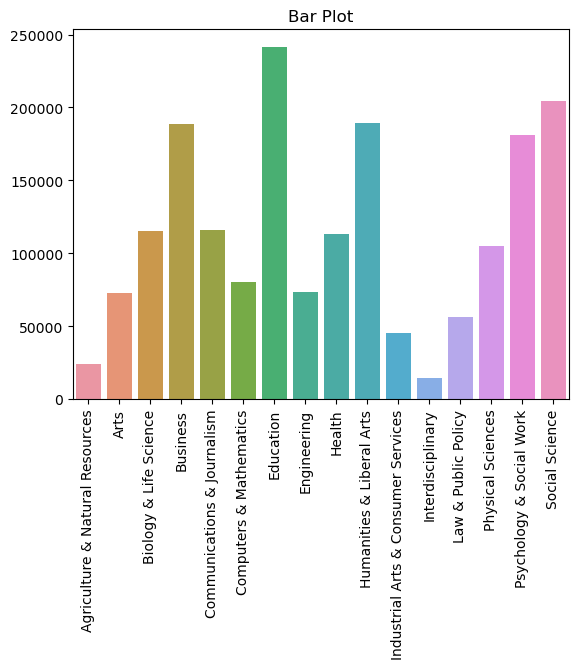

In [16]:
# Finding the mean value for total grad students and plot a bar graph for grad students using seaborn

obj_eda.bar_plot_Seaborn(df.groupby(['Major_category']).Grad_total.mean().index.tolist(),df.groupby(['Major_category']).Grad_total.mean().values.tolist())

# Observations 
Education stream has the highest number of enrollments in grad

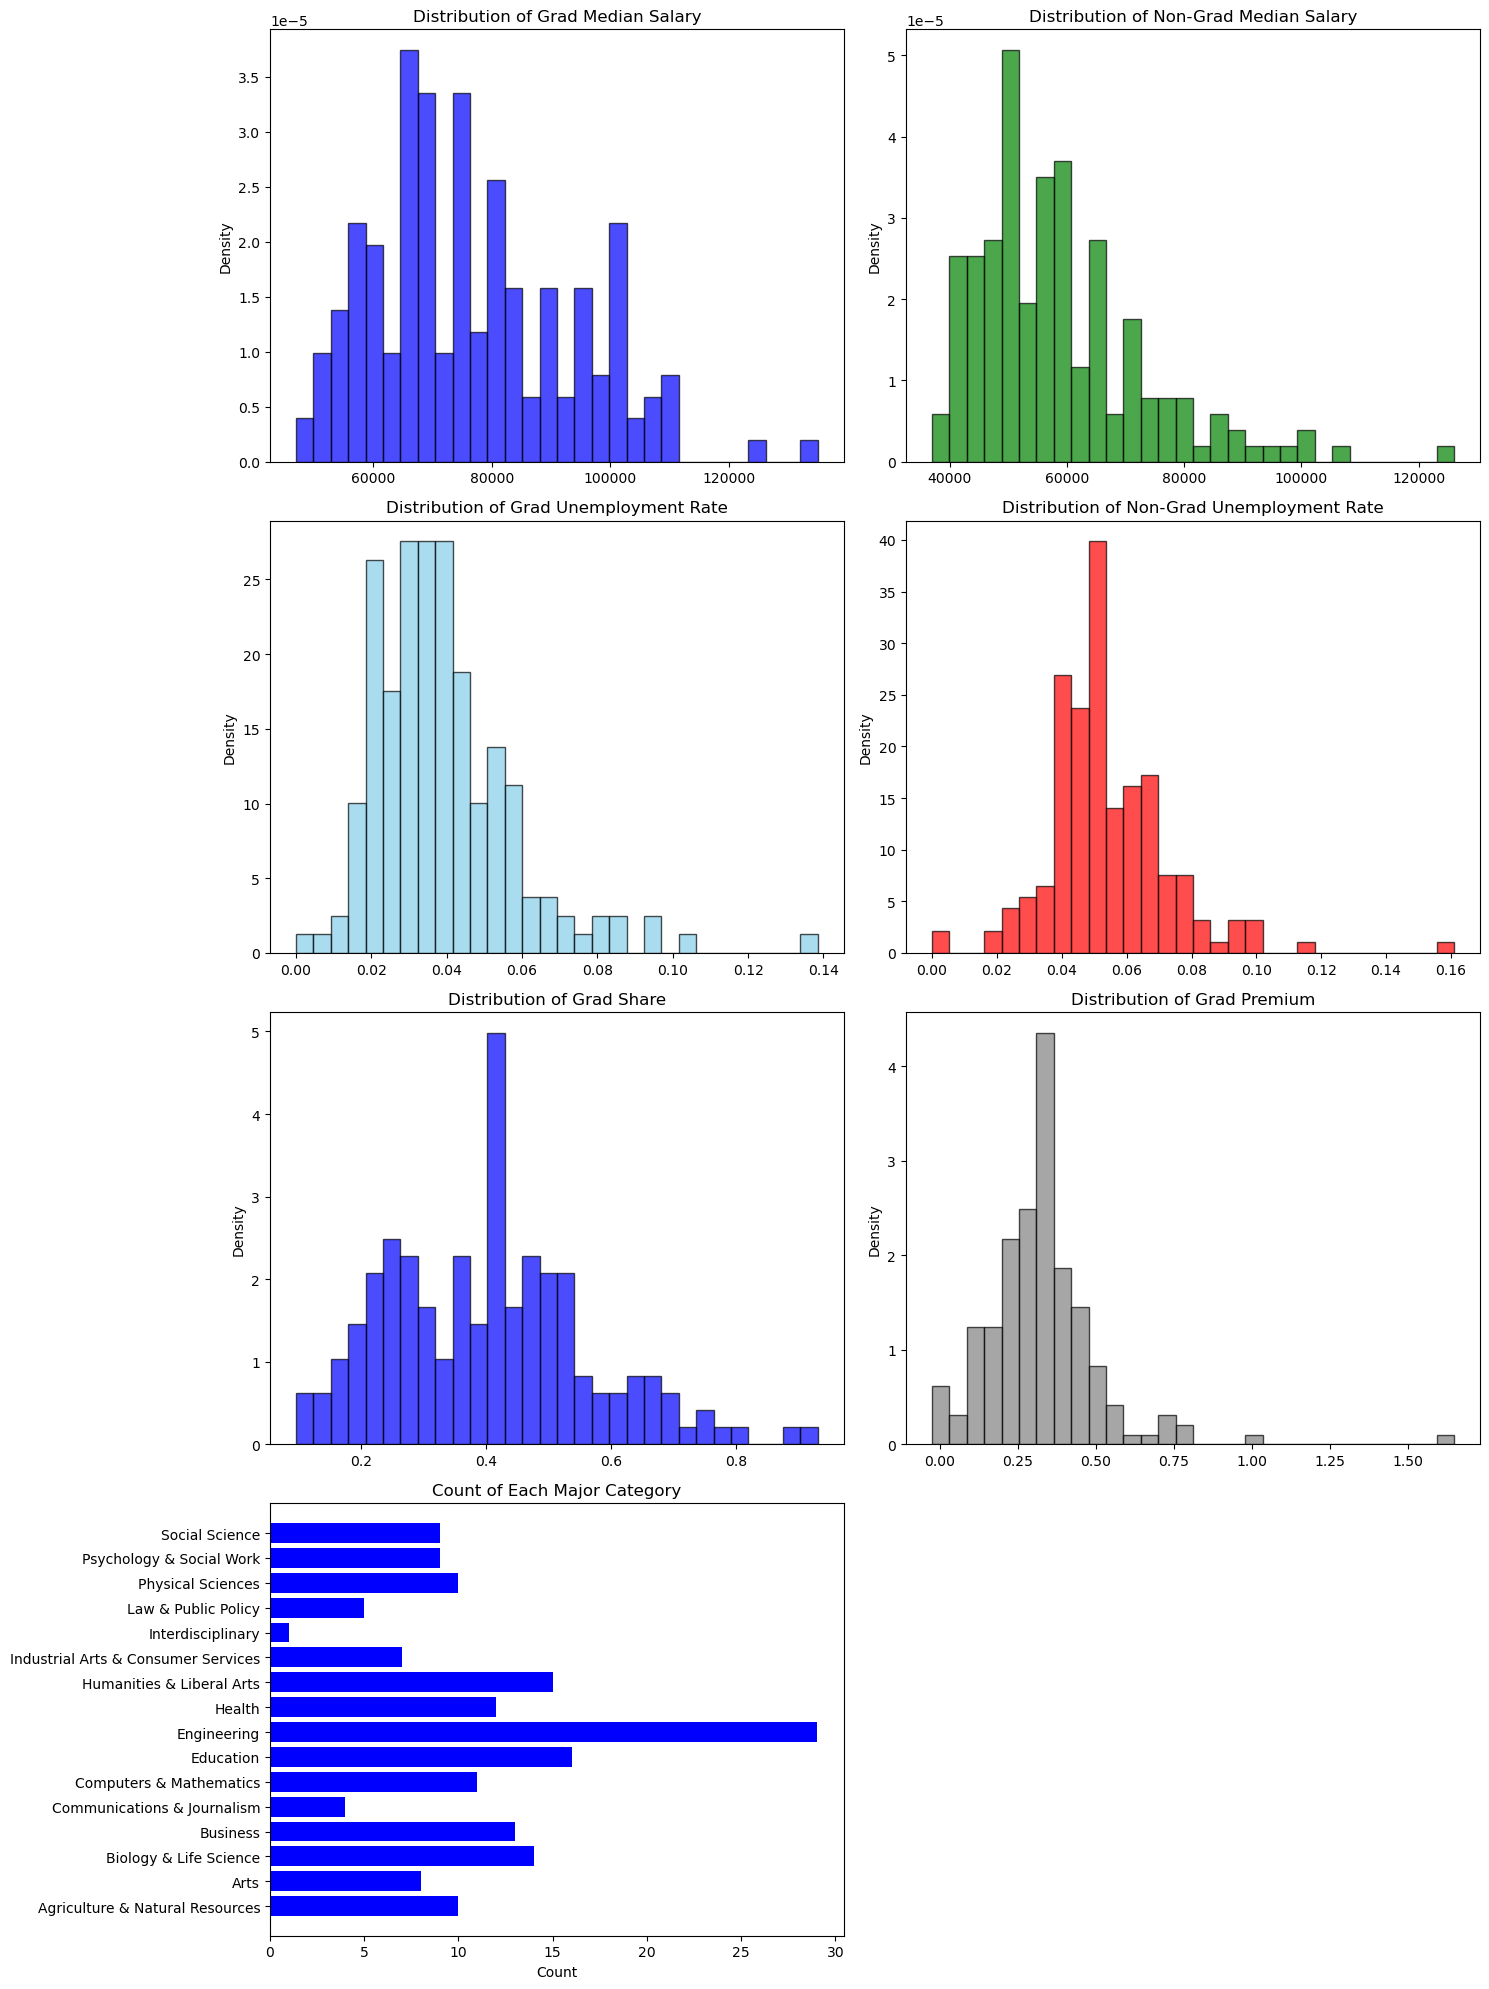

In [17]:
# Ploting histgrams for few colums using matplotlib

obj_eda.plot_student_data_matplotlib()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

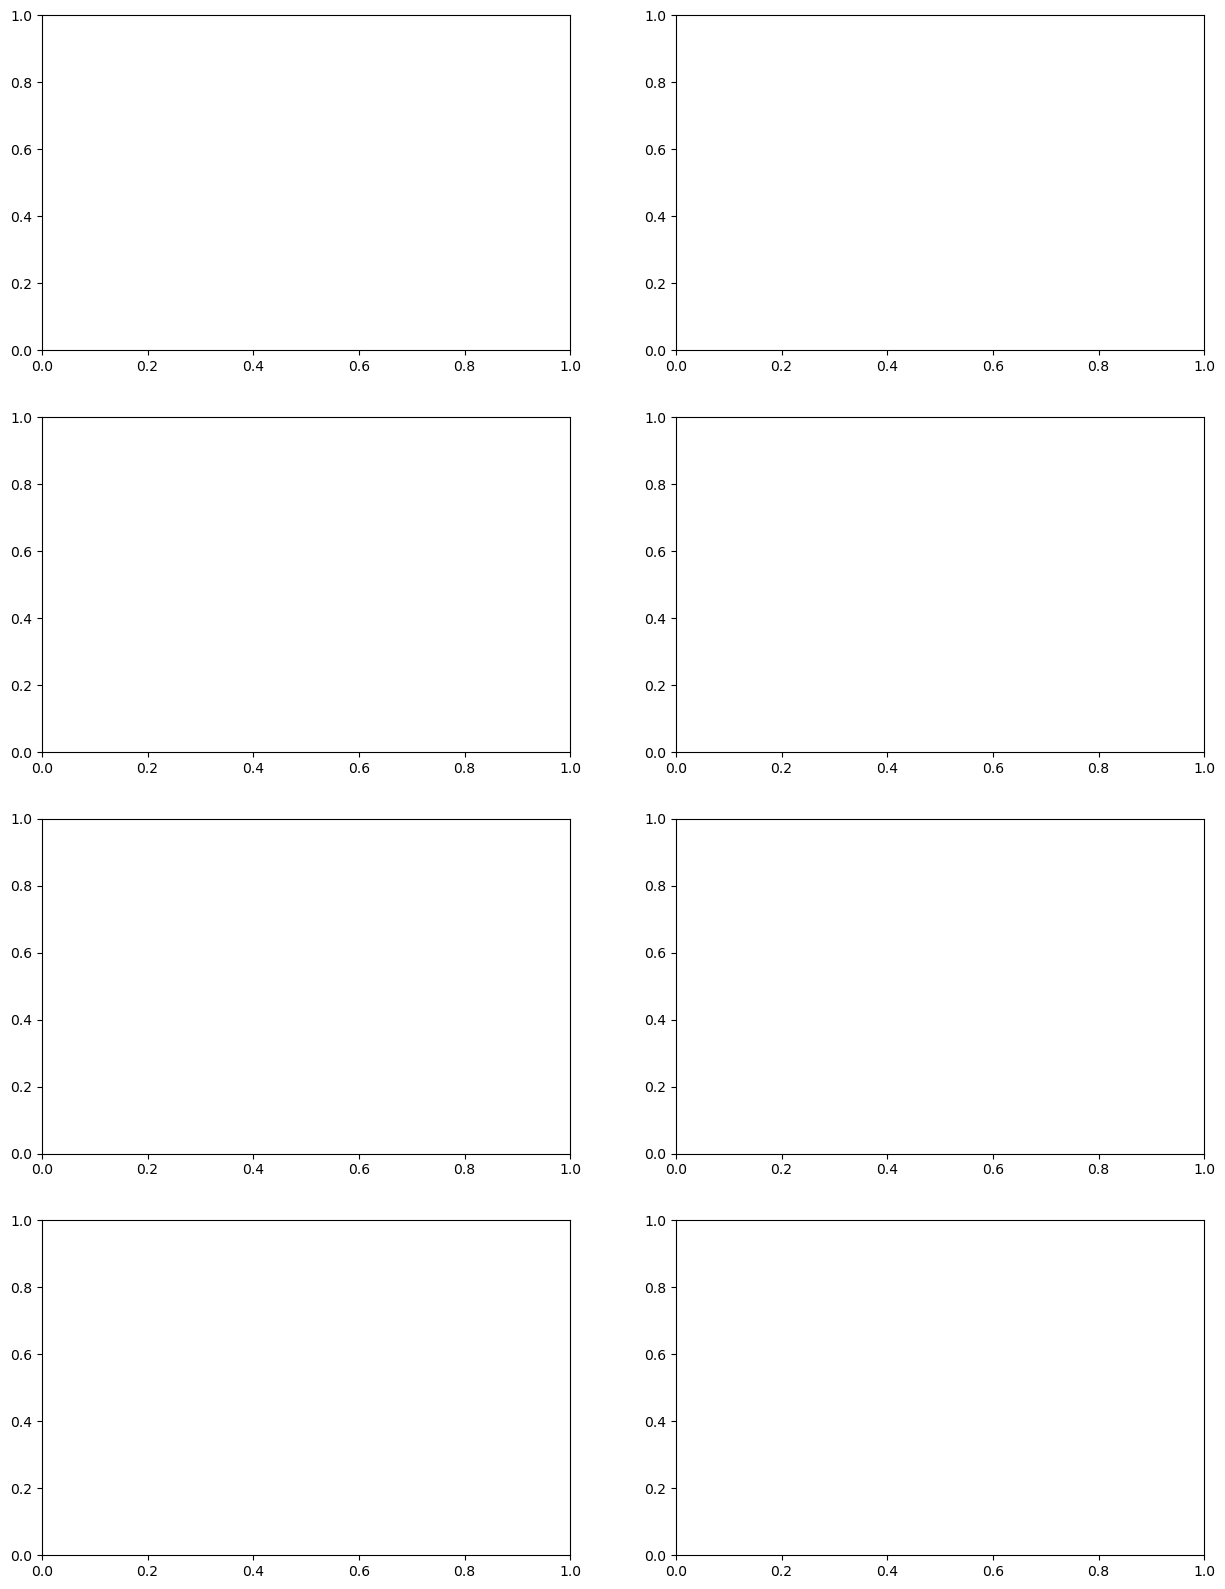

In [18]:
# Ploting histgrams for few colums using seaborn

obj_eda.plot_student_data_seaborn()

# Observations:

1. Distribution of Grad Median Salary: Most graduates seem to have a median salary in the range of $ 20,000 to $ 60,000.
2. Distribution of Non-Grad Median Salary: The median salary for non-graduates also largely falls in the range of $ 20,000 to $ 60,000, similar to graduates. However, there's a noticeable difference in the peak distributions.
3. Distribution of Grad Unemployment Rate: Most graduates have an unemployment rate below 0.1, with a few exceptions.
4. Distribution of Non-Grad Unemployment Rate: The distribution is somewhat similar to that of graduates, with most non-graduates having an unemployment rate below 0.1.
5. Distribution of Grad Share: Most values lie below 0.4, indicating that in many majors, the proportion of graduates is less than 40%.
6. Distribution of Grad Premium: The majority of the data points are concentrated around 0.1 to 0.3, suggesting that many graduates have a premium (or advantage in earnings) of 10% to 30% compared to non-graduates.
7. Count of Each Major Category: The major categories are diverse, with "Engineering" and "Education" being among the most prevalent.

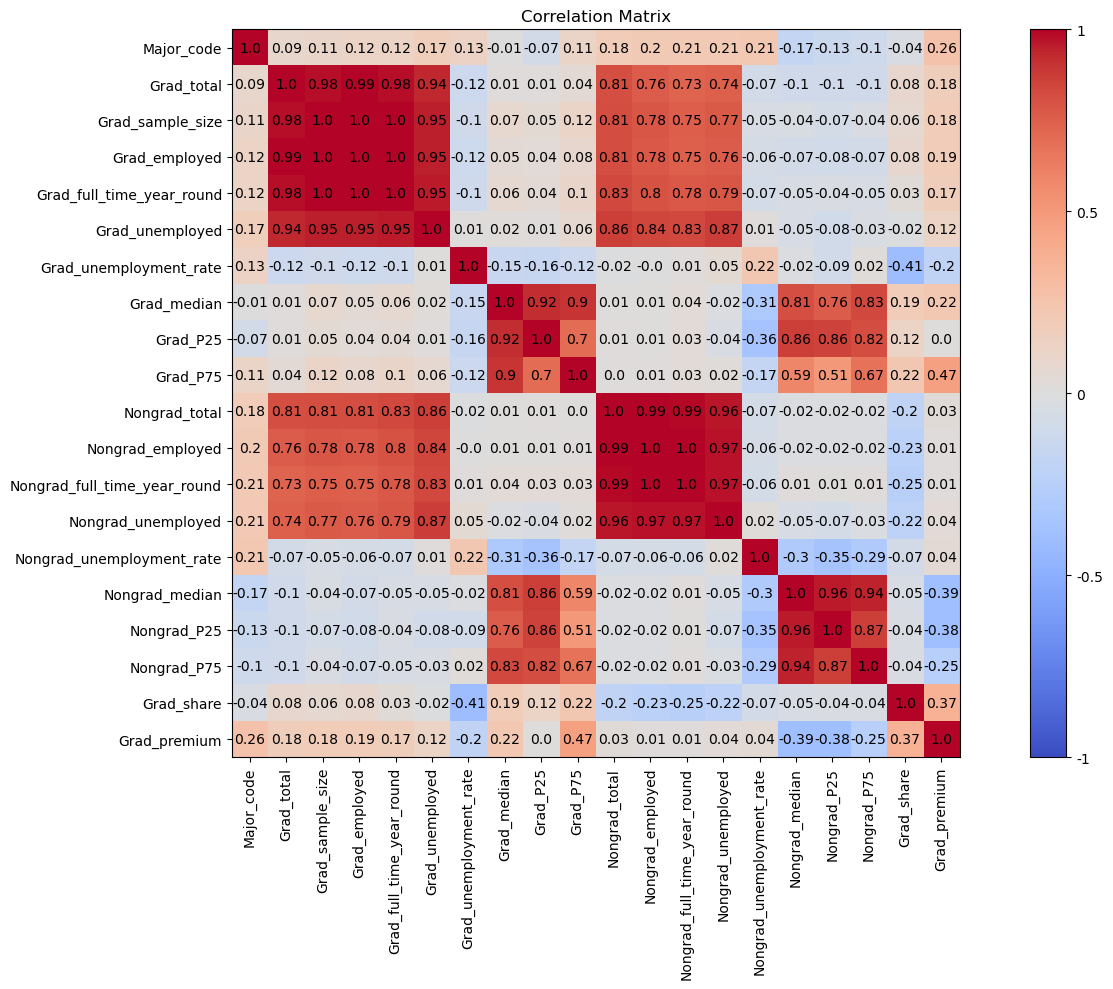

In [6]:
# Correlation_matrix for all the numeric columns using matplotlib

obj_eda.plot_correlation_matrix_matplotlib()

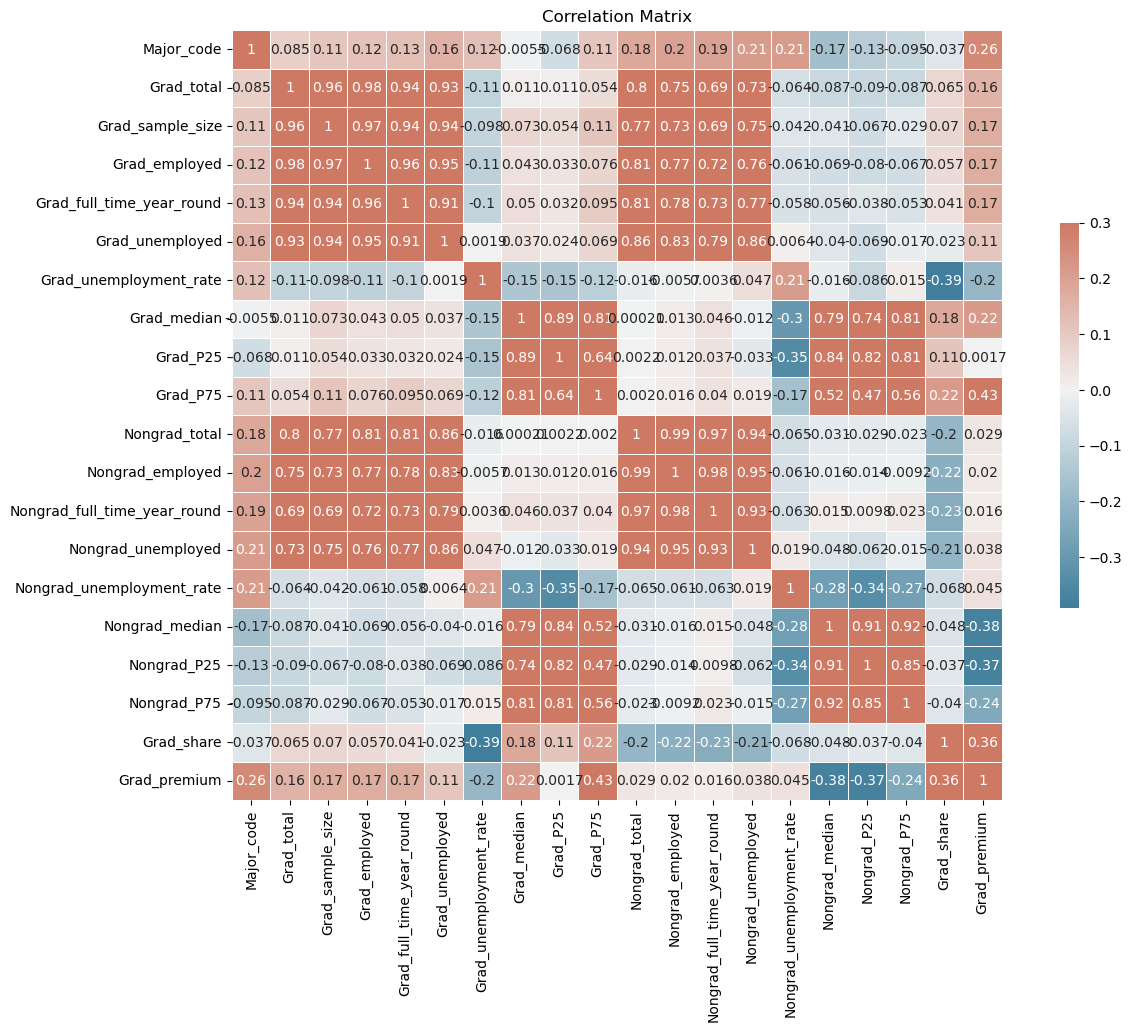

In [19]:
# Correlation_matrix for all the numeric columns using seaborn

obj_eda.plot_correlation_matrix_seaborn()

# Observations 

1. Grad Median Salary vs. Non-Grad Median Salary: There is a strong positive correlation between the median salaries of graduates and non-graduates. This suggests that majors with higher salaries for graduates often also have higher salaries for non-graduates.
2. Grad Unemployment Rate vs. Non-Grad Unemployment Rate: There's a moderate positive correlation, implying that majors with a higher unemployment rate for graduates may also tend to have a higher unemployment rate for non-graduates.
3. Grad Share vs. Grad Premium: These two show a slight negative correlation. This could suggest that in majors where there's a higher proportion of graduates, the premium or advantage in earnings that graduates have over non-graduates might be slightly lower.

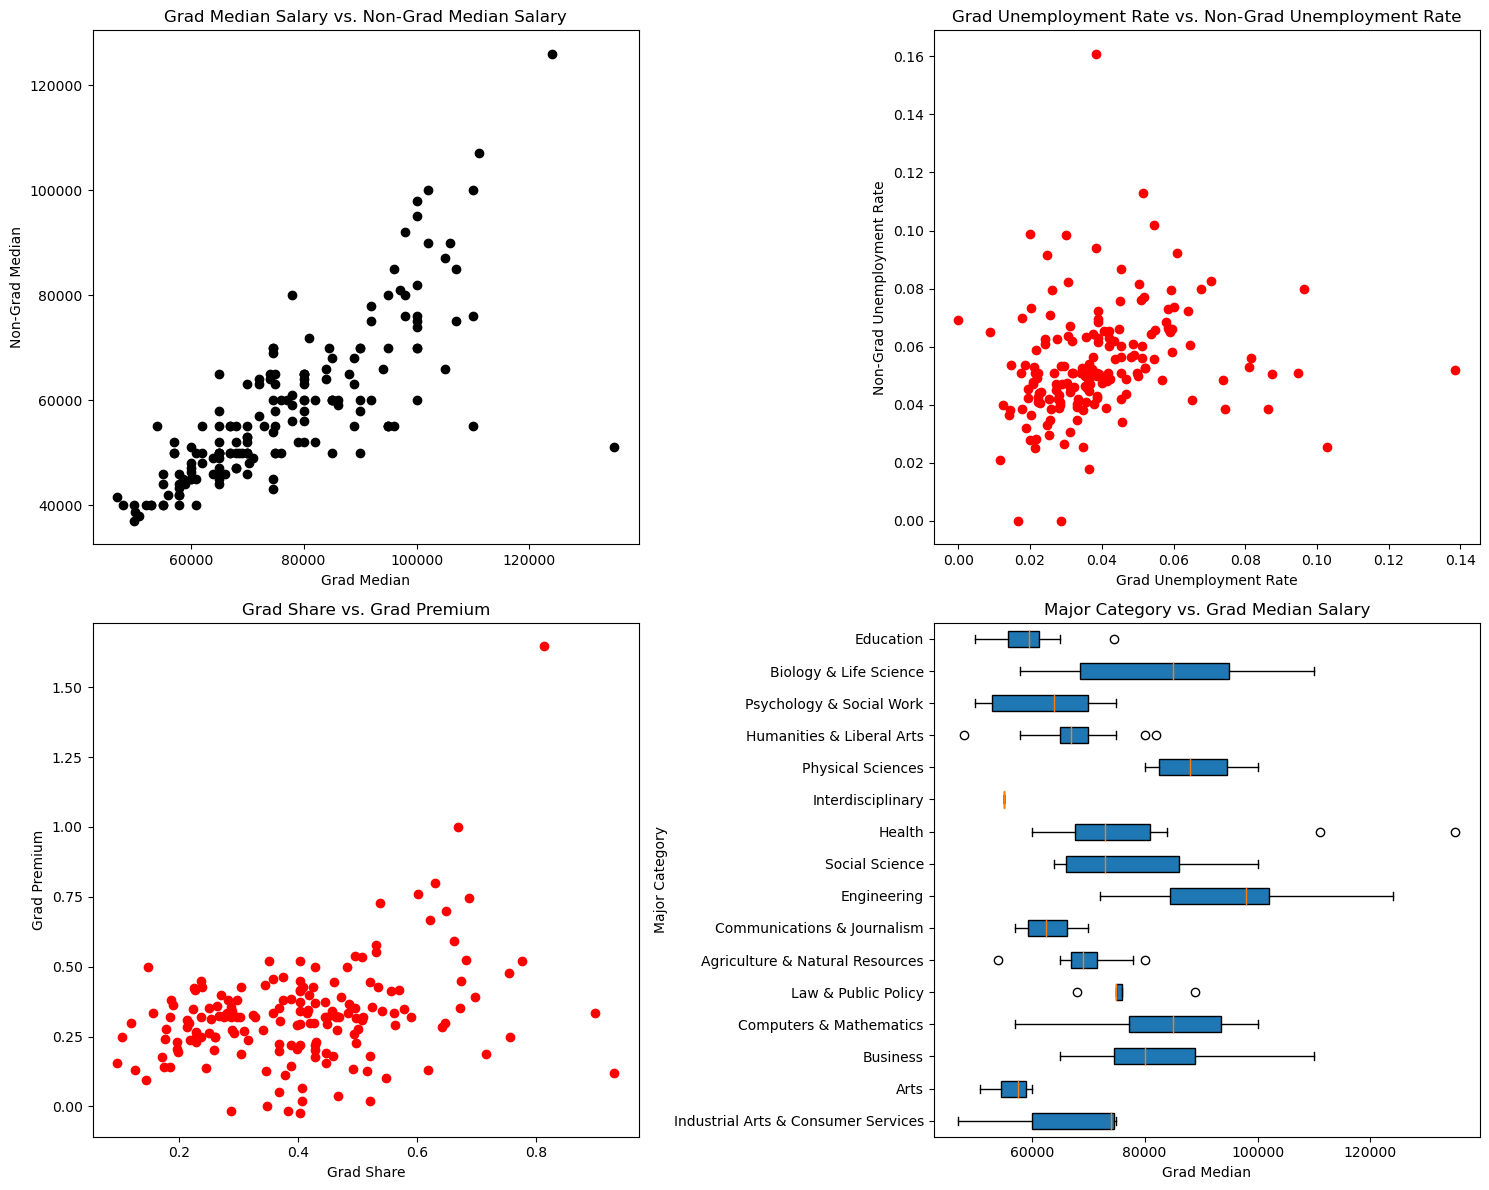

In [20]:
# Scatter plot and Box plot using matplotlib

obj_eda.scatter_box_plot_matplotlib()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

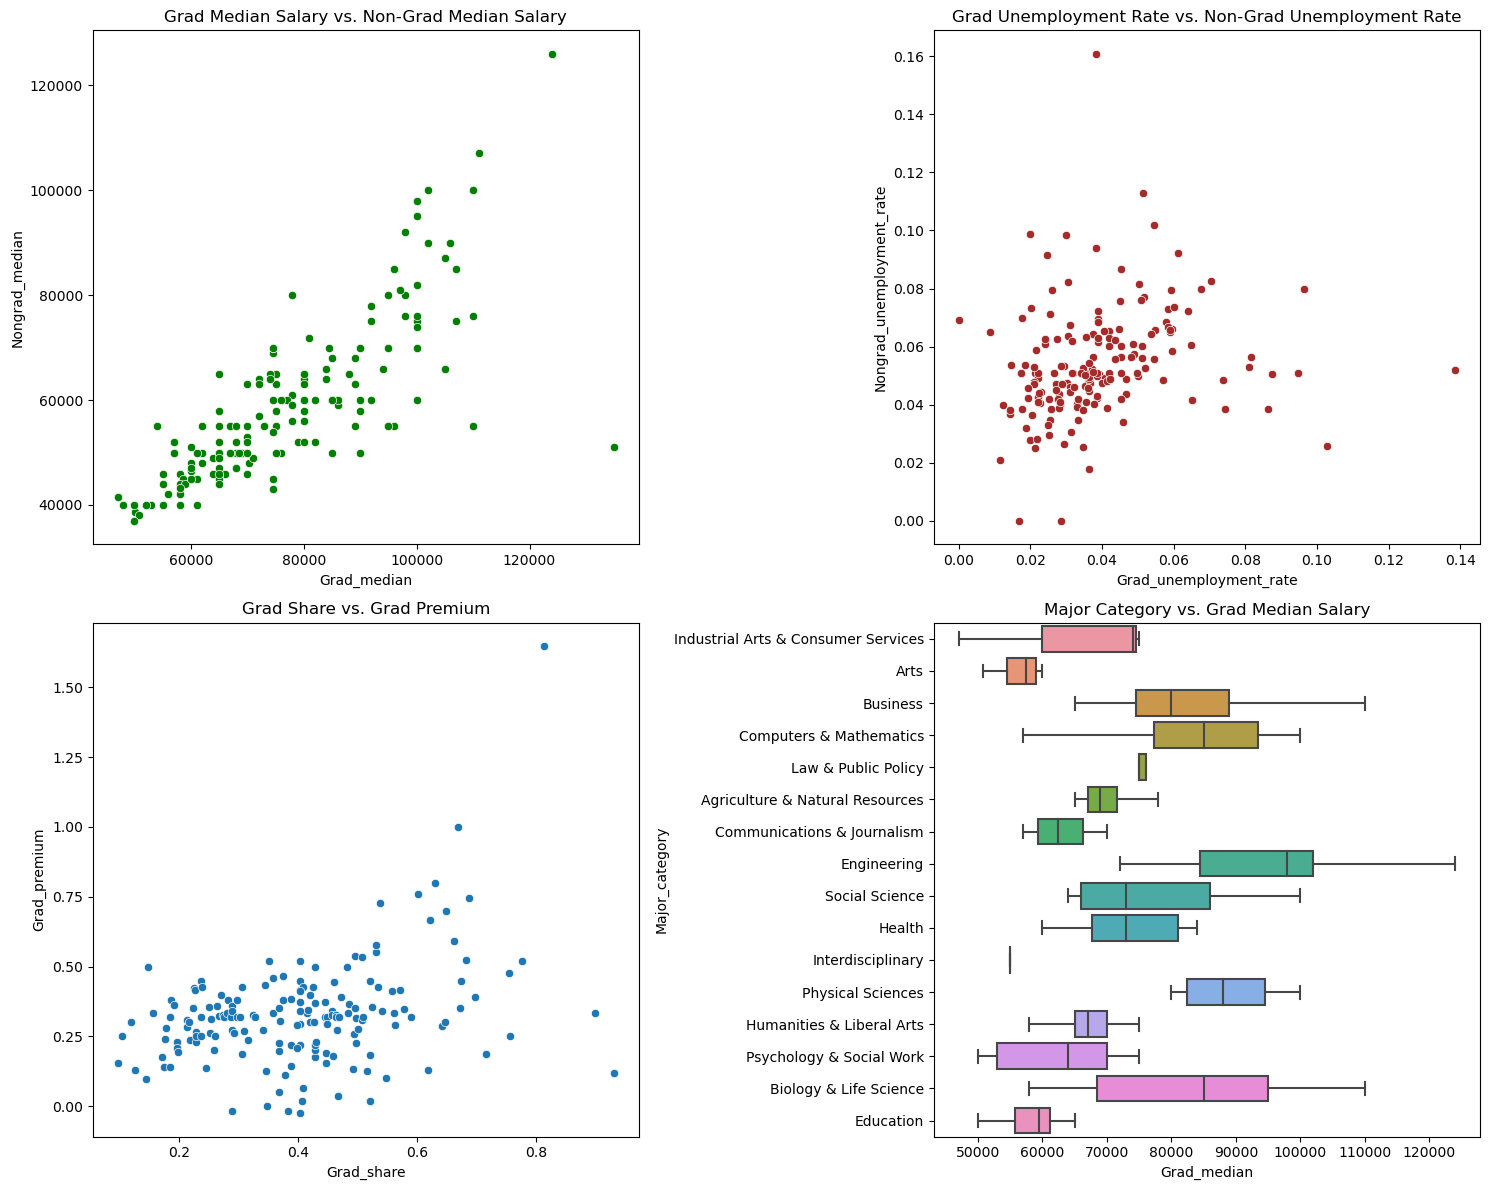

In [21]:
# Scatter plot and Box plot using seaborn

obj_eda.scatter_box_plot_seaborn()

# Observations
1. Grad Median Salary vs. Non-Grad Median Salary: As observed in the correlation matrix, there's a clear positive correlation between the median salaries of graduates and non-graduates.
2. Grad Unemployment Rate vs. Non-Grad Unemployment Rate: The scatter plot confirms the moderate positive correlation between the unemployment rates of graduates and non-graduates.
3. Grad Share vs. Grad Premium: The scatter plot shows the slight negative relationship between the proportion of graduates and the earning premium they have over non-graduates.
4. Major Category vs. Grad Median Salary: The box plot provides insights into the distribution of median salaries for graduates across different major categories. Some fields, like Engineering, tend to have higher median salaries, while others, like Education, have comparatively lower median salaries.

# Inference

In [4]:
obj_inf = inf.inference(df)

1. What is the distribution of median salaries for graduates across all majors? Which majors offer the highest potential earnings?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


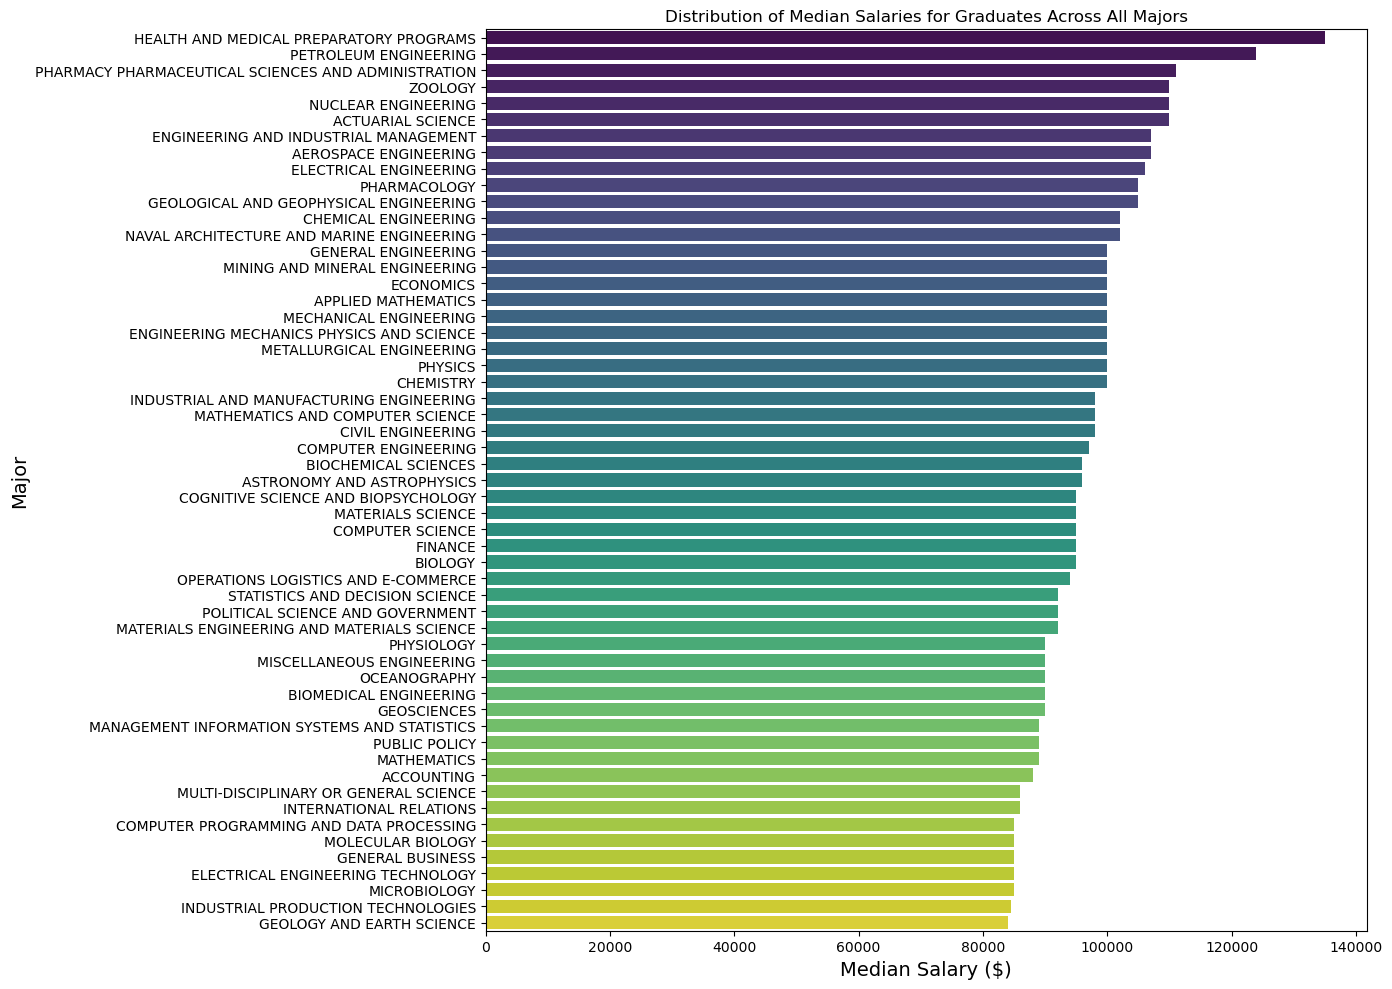

In [23]:
obj_inf.question1_matplotlib()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


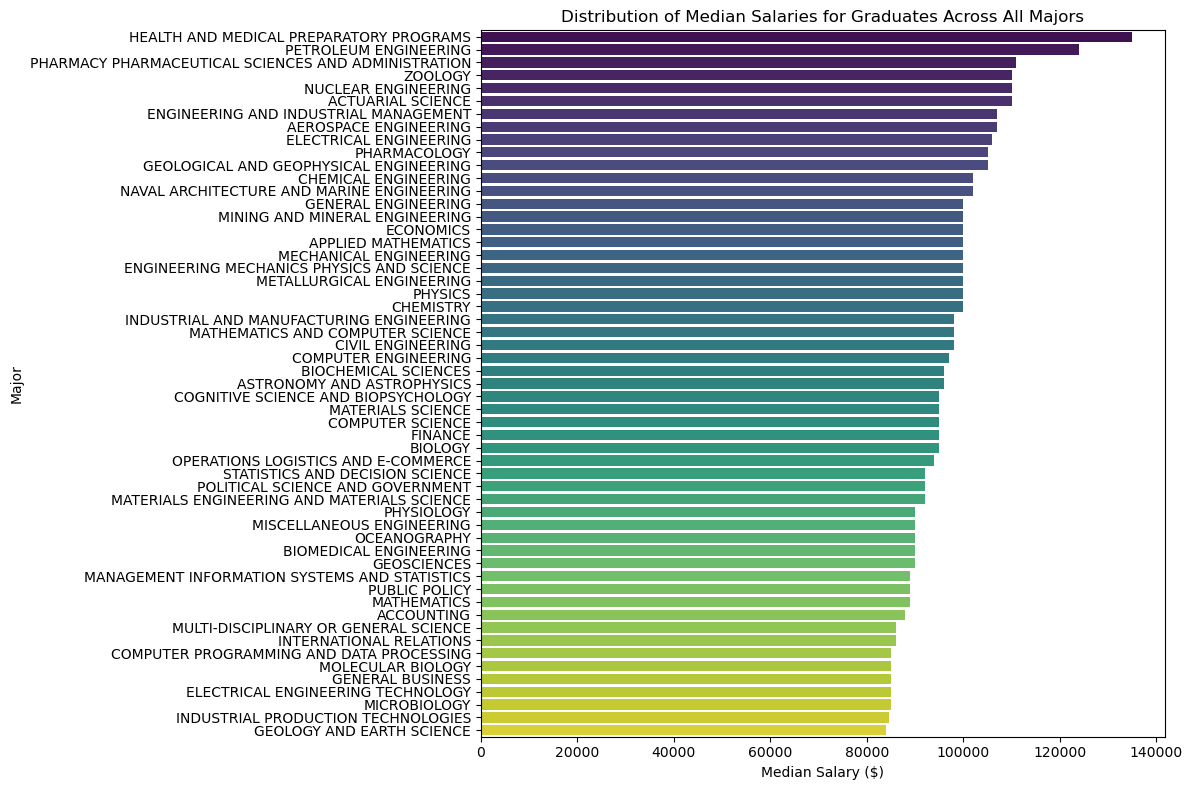

In [24]:
obj_inf.question1_seaborn()

# Conclusion:
The distribution of median salaries reveals variations across majors. Fields with the highest earnings potential offer significant economic returns for graduates. Conversely, some majors result in comparatively lower salaries. This information is pivotal for students evaluating the financial outcomes of their chosen fields.

2. Are there major categories where the earnings premium (advantage in earnings) for graduates over non-graduates is particularly high or low?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

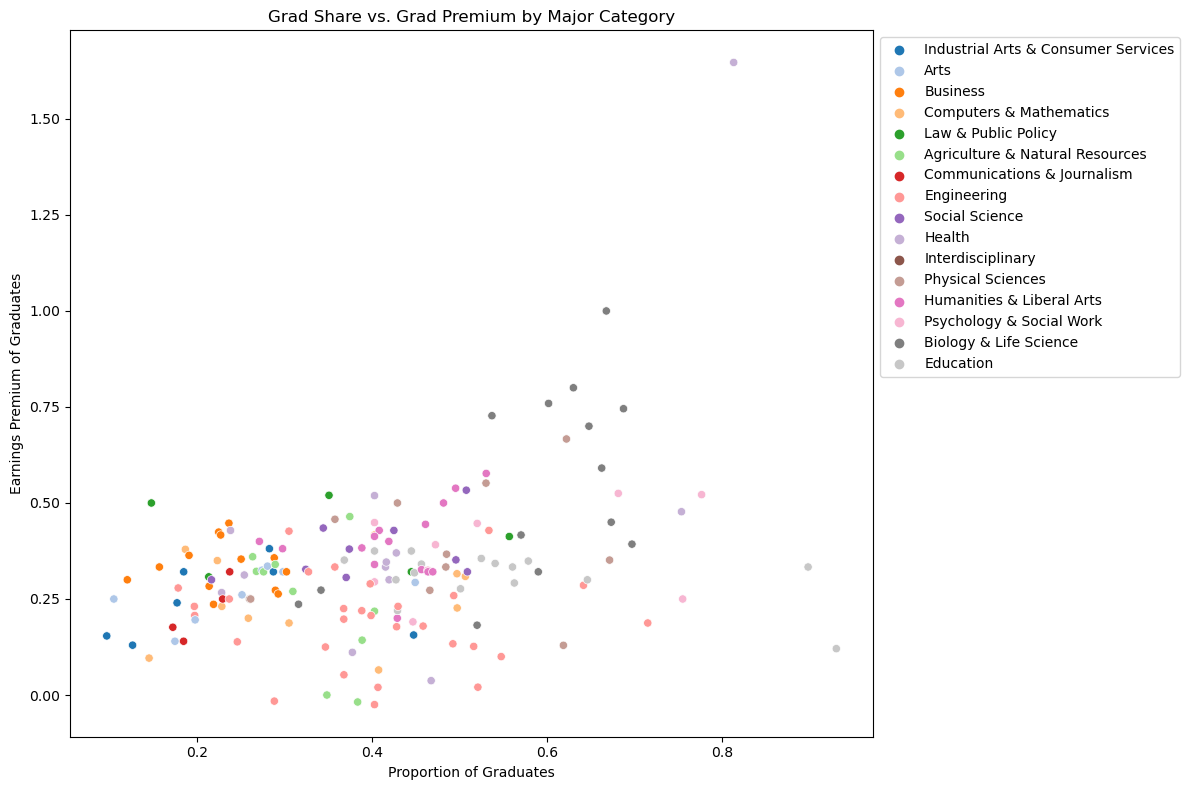

In [25]:
obj_inf.question2_seaborn()

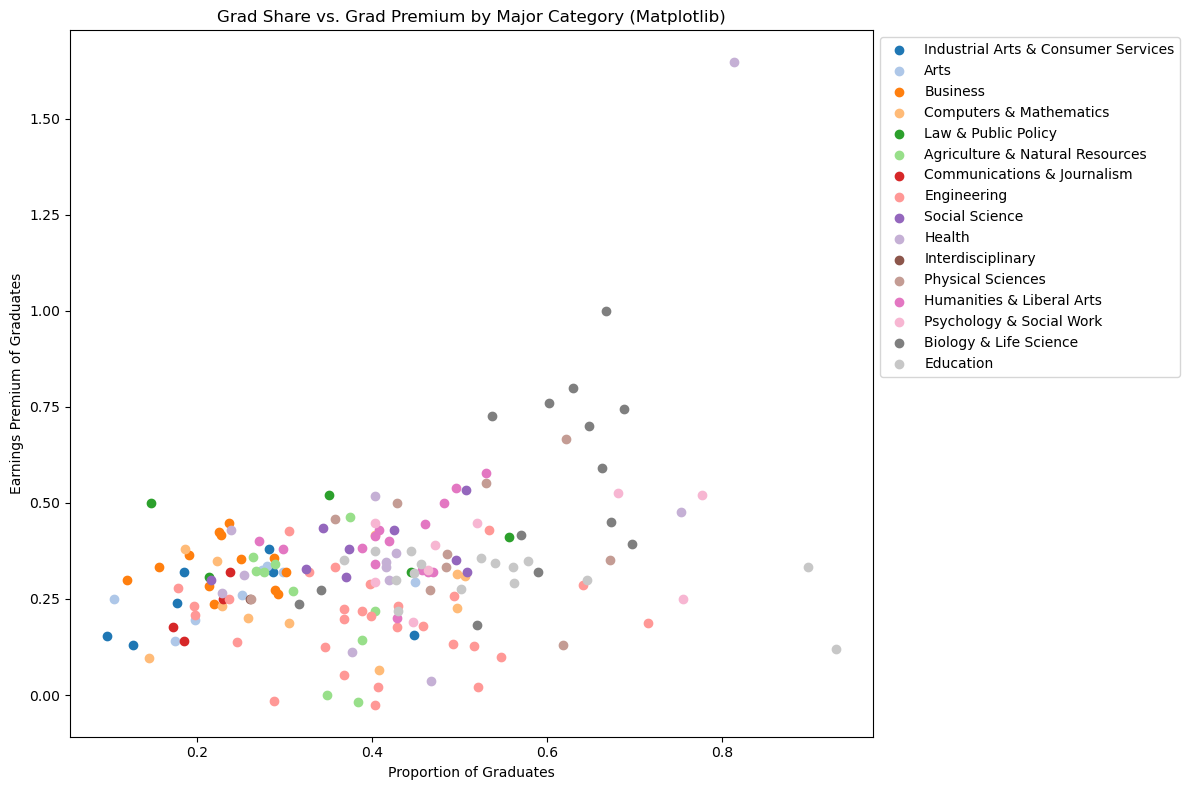

In [26]:
obj_inf.question2_matplotlib()

# Conclusion:
The plot visualizes the relationship between the proportion of graduates in a major and their earnings premium over non-graduates. Majors with a higher concentration of graduates that also show a significant earnings premium emphasize the tangible financial benefits of higher education in those fields. Conversely, majors with a high proportion of graduates but a lower earnings premium might indicate diminishing returns on investment in higher education. The variation across major categories highlights the importance of informed career and educational choices to maximize potential earnings benefits.

3. Is there a relationship between the proportion of graduates in a major and the unemployment rate for graduates in that major?

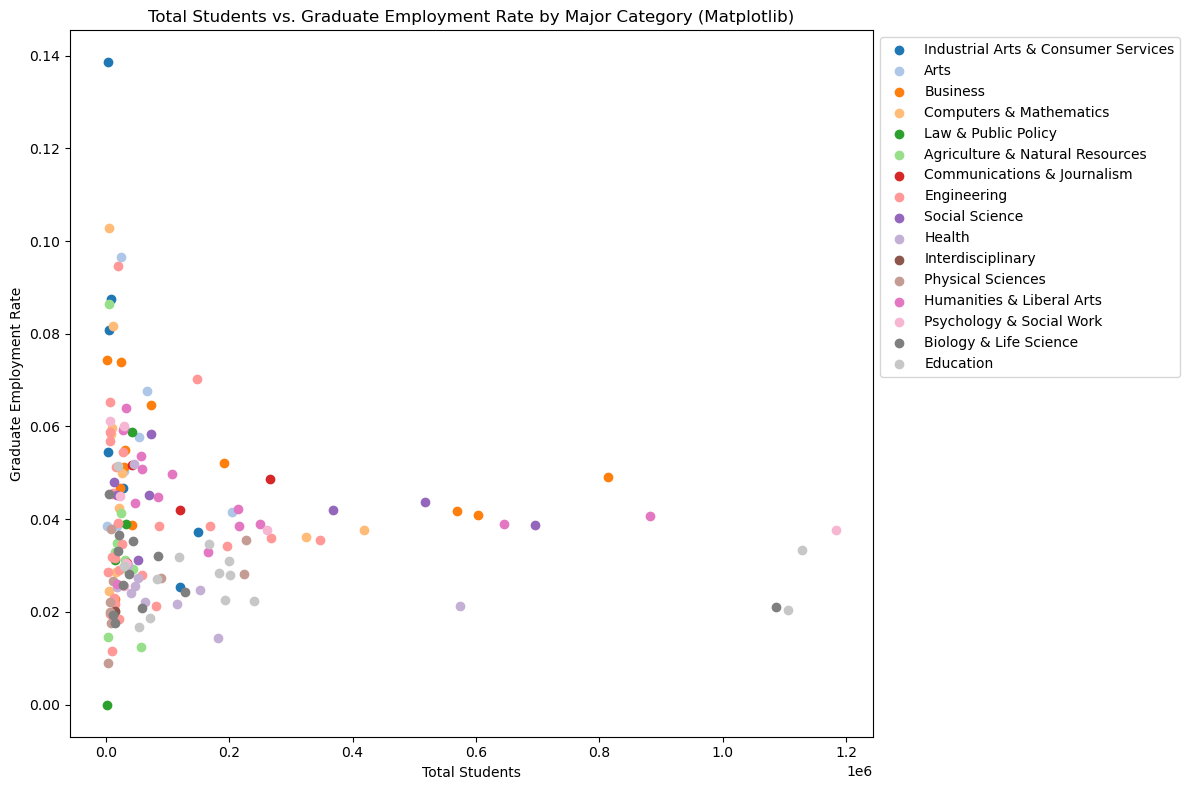

In [5]:
obj_inf.question3_matplotlib()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

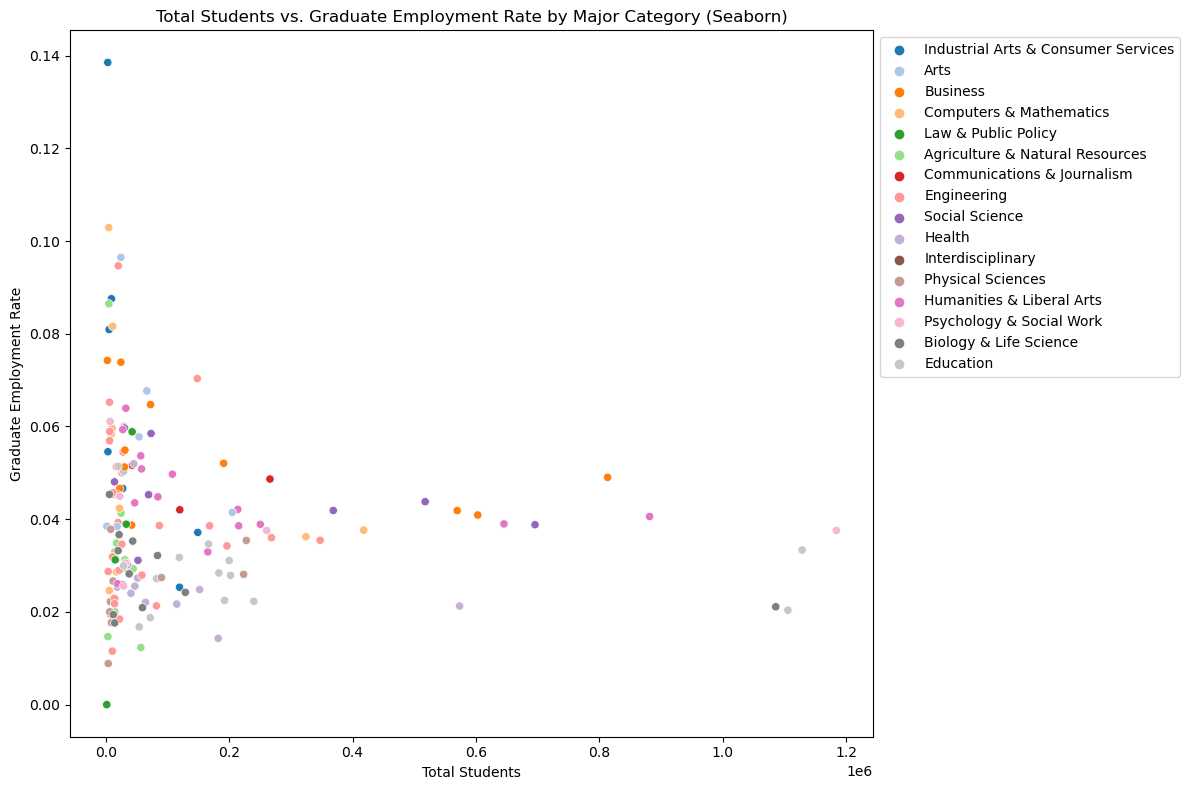

In [6]:
obj_inf.question3_seaborn()

# Conclusion:
The Plot illuminates the correlation between total students in a major and the corresponding graduate unemployment rate. It is evident from the plot that there is a discernible dispersion of points, indicating a varied relationship between student enrollment and graduate unemployment across different majors. Interestingly, certain majors with higher student populations exhibit lower unemployment rates, challenging the notion that popularity necessarily leads to higher unemployment. Major categories' distinct clusters highlight the nuanced dynamics within fields of study, emphasizing the importance of a thorough understanding when evaluating the interplay between student enrollment and graduate unemployment outcomes.

# Overall Conclusion:
The analysis delves into various facets of graduates' economic outcomes based on their majors. For median salaries (Q1), some majors clearly offer higher earning potentials, highlighting the substantial financial disparities across fields. In terms of the earnings premium of graduates over non-graduates (Q2), certain fields present a marked advantage for degree holders, underlining the tangible benefits of higher education in specific domains. Lastly, examining the total number of students against employment rates (Q3) uncovers that the popularity of a major doesn't always correlate with favorable job prospects. Collectively, these insights underscore the imperative of informed educational choices for prospective students.

# Reference 

https://stackabuse.com/rotate-axis-labels-in-matplotlib/

https://github.com/fivethirtyeight/data/tree/master/college-majors

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

